In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
x_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 classes
])

| Layer Type  | Purpose                        | Shape Change            |
| ----------- | ------------------------------ | ----------------------- |
| Conv2D (32) | Extract low-level features     | (32,32,3) → (30,30,32)  |
| MaxPool     | Downsample                     | (30,30,32) → (15,15,32) |
| Conv2D (64) | Extract mid-level features     | (15,15,32) → (13,13,64) |
| MaxPool     | Downsample                     | (13,13,64) → (6,6,64)   |
| Conv2D (64) | Extract high-level features    | (6,6,64) → (4,4,64)     |
| Flatten     | Prepare for Dense Layer        | (4,4,64) → (1024,)      |
| Dense (64)  | Learn combinations of features | (1024,) → (64,)         |
| Dense (10)  | Output class logits            | (64,) → (10,)           |

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5355 - accuracy: 0.4366 - val_loss: 1.3414 - val_accuracy: 0.5086
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1762 - accuracy: 0.5803 - val_loss: 1.0892 - val_accuracy: 0.6114
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0129 - accuracy: 0.6455 - val_loss: 0.9953 - val_accuracy: 0.6537
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9151 - accuracy: 0.6779 - val_loss: 0.9575 - val_accuracy: 0.6703
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8457 - accuracy: 0.7020 - val_loss: 0.9245 - val_accuracy: 0.6787
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7956 - accuracy: 0.7221 - val_loss: 0.8821 - val_accuracy: 0.6966
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7449 - accuracy: 0.7404 - val_loss: 0.8981 -

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

313/313 - 1s - loss: 0.8773 - accuracy: 0.7057 - 1s/epoch - 4ms/step
Test Accuracy: 0.7056999802589417


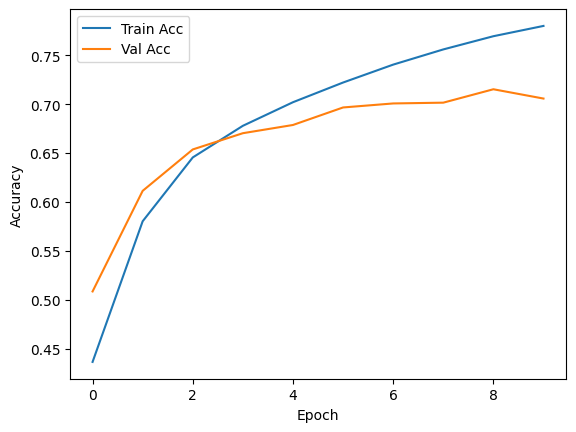

In [15]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()